# <span style="color:darkmagenta">CellTypist</span>
**CellTypist**: es una herramienta para identificar tipos celulares en datos de ARN usando modelos entrenados previamente (enfocados en células inmunes). Usa clasificadores de regresión logística optimizados mediante el **descenso de gradiente estocástico (SGD)**, lo que mejora la precisión y la velocidad al asignar etiquetas.

**Descenso de gradiente estocástico (SGD)**: Es un método para optimizar funciones (como las de error o pérdida). Calcula iterativamente ajustes a los parámetros del modelo tomando pequeños pasos en la dirección que reduce la pérdida. A diferencia del gradiente completo, **SGD usa un subconjunto (batch) de datos por iteración**, lo que lo hace más rápido y adecuado para grandes datasets como scRNA-seq

El descenso de gradiente estocástico (SGD) se expresa como:  
$$\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta; x_i, y_i)$$

Donde:  
- $\theta_t$  son los parámetros del modelo en la iteración $t$.  
- $\eta$ es la tasa de aprendizaje (controla el tamaño del paso).  
- $L(\theta; x_i, y_i)$ es la función de pérdida para un solo ejemplo $x_i, y_i$ (dato y etiqueta).  
- $\nabla_\theta L(\theta; x_i, y_i)$ es el gradiente de la pérdida respecto a $\theta$.  

En cada iteración, se usa un único dato o un pequeño lote (batch) en lugar del conjunto completo, reduciendo de ese modo el costo computacional.

**scArches**: es un framework para integrar y transferir datos de scRNA-seq entre estudios o condiciones usando modelos generativos (basados en VAE). Facilita la comparación de conjuntos de datos heterogéneos, destacando en análisis de referencia y transferencia de etiquetas.

-----------

In [1]:
#Para descargas
import gdown, os, gzip, shutil

# Gestión básica de datos y representación gráfica
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import os
 
# Scanpy fundamentals
import anndata as ad
import scanpy as sc
import seaborn as sb

# sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(figsize=(6, 6))
import scvi

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-

In [2]:
adata = sc.read_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/P3_integrated.h5ad')

In [3]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts'])

In [4]:
model=scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood='nb')

In [5]:
model.train()

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mcgonzalez/miniconda3/envs/Servicio/lib/python ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mcgonzalez/miniconda3/envs/Servicio/lib/python ...
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have man

Epoch 76/76: 100%|█| 76/76 [38:40<00:00, 31.34s/it, v_num=1, train_loss_step=4.5

`Trainer.fit` stopped: `max_epochs=76` reached.


Epoch 76/76: 100%|█| 76/76 [38:40<00:00, 30.53s/it, v_num=1, train_loss_step=4.5


In [6]:
adata

AnnData object with n_obs × n_vars = 105197 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

Aquí continúa la parte de integración

In [ ]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [ ]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)

In [ ]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

In [ ]:
adata.layers['scvi_normalized']=model.get_normalized_expression(library_size = 1e4)

In [ ]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["Sample"],
    frameon=False,
    ncols=1,
)

In [ ]:
adata.obs

### Instalación de CellTypist

In [7]:
!pip install celltypist

In [8]:
import scanpy as sc

In [10]:
import celltypist
from celltypist import models

## Download a scRNA-seq dataset of 2,000 immune cells

In [11]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...
9,Adult_Mouse_OlfactoryBulb.pkl,cell types from the olfactory bulb of adult mice


In [12]:
model = models.Model.load('Healthy_Human_Liver.pkl')

In [13]:
model

CellTypist model with 17 cell types and 2691 features
    date: 2023-09-14 12:48:54.179790
    details: cell types from scRNA-seq and snRNA-seq of the adult human liver
    source: https://doi.org/10.1016/j.cell.2021.12.018
    version: v1
    cell types: B cells, Basophils, ..., pDCs
    features: HES4, TNFRSF18, ..., MT-CYB

In [14]:
model.cell_types

array(['B cells', 'Basophils', 'Cholangiocytes', 'Circulating NK/NKT',
       'Endothelial cells', 'Fibroblasts', 'Hepatocytes', 'Macrophages',
       'Mig.cDCs', 'Mono+mono derived cells', 'Neutrophils',
       'Plasma cells', 'Resident NK', 'T cells', 'cDC1s', 'cDC2s', 'pDCs'],
      dtype=object)

In [16]:
adata_2000 = sc.read_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/P3_integrated.h5ad')

In [17]:
adata_2000.shape

(105197, 11762)

In [18]:
adata_2000.X.expm1().sum(axis = 1)

matrix([[10000.001],
        [10000.   ],
        [10000.001],
        ...,
        [10000.   ],
        [10000.   ],
        [10000.   ]], dtype=float32)

In [19]:
adata_2000.obs

,n_genes,Sample,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden
AAACCCAAGACCGCCT-1,1419,h5ad/tumor,False,1419,2097.0,0.0,0.0,0,0,17
AAACCCAAGAGGCGGA-1,808,h5ad/tumor,False,808,1059.0,0.0,0.0,0,0,26
AAACCCAAGCAGCCTC-1,1700,h5ad/tumor,False,1700,2728.0,0.0,0.0,0,0,19
AAACCCAAGCCGTTAT-1,3397,h5ad/tumor,False,3397,8238.0,0.0,0.0,0,0,31
AAACCCAAGGACGGAG-1,3444,h5ad/tumor,False,3444,8871.0,0.0,0.0,0,0,19
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTTTGC-1,5512,h5ad/control7,False,5512,22386.0,0.0,0.0,0,0,4
TTTGTTGGTCTCGGGT-1,2940,h5ad/control7,False,2940,7561.0,0.0,0.0,0,0,4
TTTGTTGGTGCCTGCA-1,3599,h5ad/control7,False,3599,10608.0,0.0,0.0,0,0,4
TTTGTTGTCAGAACCT-1,3305,h5ad/control7,False,3305,9792.0,0.0,0.0,0,0,4


----------
### Assign cell type labels using a CellTypist built-in model

In [20]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 52
📂 Storing models in /home/mcgonzalez/.celltypist/data/models
💾 Downloading model [1/52]: Immune_All_Low.pkl
💾 Downloading model [2/52]: Immune_All_High.pkl
💾 Downloading model [3/52]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/52]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/52]: Adult_Human_MTG.pkl
💾 Downloading model [6/52]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/52]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/52]: Adult_Human_Skin.pkl
💾 Downloading model [9/52]: Adult_Mouse_Gut.pkl
💾 Downloading model [10/52]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [11/52]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [12/52]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [13/52]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [14/52]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [15/52]: COVID19_Immune_La

In [21]:
models.models_path

'/home/mcgonzalez/.celltypist/data/models'

In [22]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...
9,Adult_Mouse_OlfactoryBulb.pkl,cell types from the olfactory bulb of adult mice


In [23]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Healthy_Human_Liver.pkl')

In [24]:
model

CellTypist model with 17 cell types and 2691 features
    date: 2023-09-14 12:48:54.179790
    details: cell types from scRNA-seq and snRNA-seq of the adult human liver
    source: https://doi.org/10.1016/j.cell.2021.12.018
    version: v1
    cell types: B cells, Basophils, ..., pDCs
    features: HES4, TNFRSF18, ..., MT-CYB

In [25]:
model.cell_types

array(['B cells', 'Basophils', 'Cholangiocytes', 'Circulating NK/NKT',
       'Endothelial cells', 'Fibroblasts', 'Hepatocytes', 'Macrophages',
       'Mig.cDCs', 'Mono+mono derived cells', 'Neutrophils',
       'Plasma cells', 'Resident NK', 'T cells', 'cDC1s', 'cDC2s', 'pDCs'],
      dtype=object)

In [26]:
# Not run; predict cell identities using this loaded model.
#predictions = celltypist.annotate(adata_2000, model = model, majority_voting = True)
# Alternatively, just specify the model name (recommended as this ensures the model is intact every time it is loaded).
predictions = celltypist.annotate(adata_2000, model = 'Healthy_Human_Liver.pkl', majority_voting = True)

🔬 Input data has 105197 cells and 11762 genes
🔗 Matching reference genes in the model
🧬 2027 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!


In [27]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
AAACCCAAGACCGCCT-1,Hepatocytes,485,Hepatocytes
AAACCCAAGAGGCGGA-1,Hepatocytes,386,Hepatocytes
AAACCCAAGCAGCCTC-1,Cholangiocytes,262,Hepatocytes
AAACCCAAGCCGTTAT-1,Endothelial cells,265,Endothelial cells
AAACCCAAGGACGGAG-1,Hepatocytes,416,Hepatocytes
...,...,...,...
TTTGTTGGTCCTTTGC-1,Hepatocytes,146,Hepatocytes
TTTGTTGGTCTCGGGT-1,Hepatocytes,164,Hepatocytes
TTTGTTGGTGCCTGCA-1,Hepatocytes,200,Hepatocytes
TTTGTTGTCAGAACCT-1,Hepatocytes,127,Hepatocytes


In [28]:
# Get an `AnnData` with predicted labels embedded into the cell metadata columns.
adata = predictions.to_adata()

In [29]:
adata.obs

,n_genes,Sample,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden,predicted_labels,over_clustering,majority_voting,conf_score
AAACCCAAGACCGCCT-1,1419,h5ad/tumor,False,1419,2097.0,0.0,0.0,0,0,17,Hepatocytes,485,Hepatocytes,0.999996
AAACCCAAGAGGCGGA-1,808,h5ad/tumor,False,808,1059.0,0.0,0.0,0,0,26,Hepatocytes,386,Hepatocytes,1.000000
AAACCCAAGCAGCCTC-1,1700,h5ad/tumor,False,1700,2728.0,0.0,0.0,0,0,19,Cholangiocytes,262,Hepatocytes,0.831152
AAACCCAAGCCGTTAT-1,3397,h5ad/tumor,False,3397,8238.0,0.0,0.0,0,0,31,Endothelial cells,265,Endothelial cells,0.787650
AAACCCAAGGACGGAG-1,3444,h5ad/tumor,False,3444,8871.0,0.0,0.0,0,0,19,Hepatocytes,416,Hepatocytes,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTTTGC-1,5512,h5ad/control7,False,5512,22386.0,0.0,0.0,0,0,4,Hepatocytes,146,Hepatocytes,1.000000
TTTGTTGGTCTCGGGT-1,2940,h5ad/control7,False,2940,7561.0,0.0,0.0,0,0,4,Hepatocytes,164,Hepatocytes,1.000000
TTTGTTGGTGCCTGCA-1,3599,h5ad/control7,False,3599,10608.0,0.0,0.0,0,0,4,Hepatocytes,200,Hepatocytes,1.000000
TTTGTTGTCAGAACCT-1,3305,h5ad/control7,False,3305,9792.0,0.0,0.0,0,0,4,Hepatocytes,127,Hepatocytes,1.000000


In [30]:
# If the UMAP or any cell embeddings are already available in the `AnnData`, skip this command.
sc.tl.umap(adata)

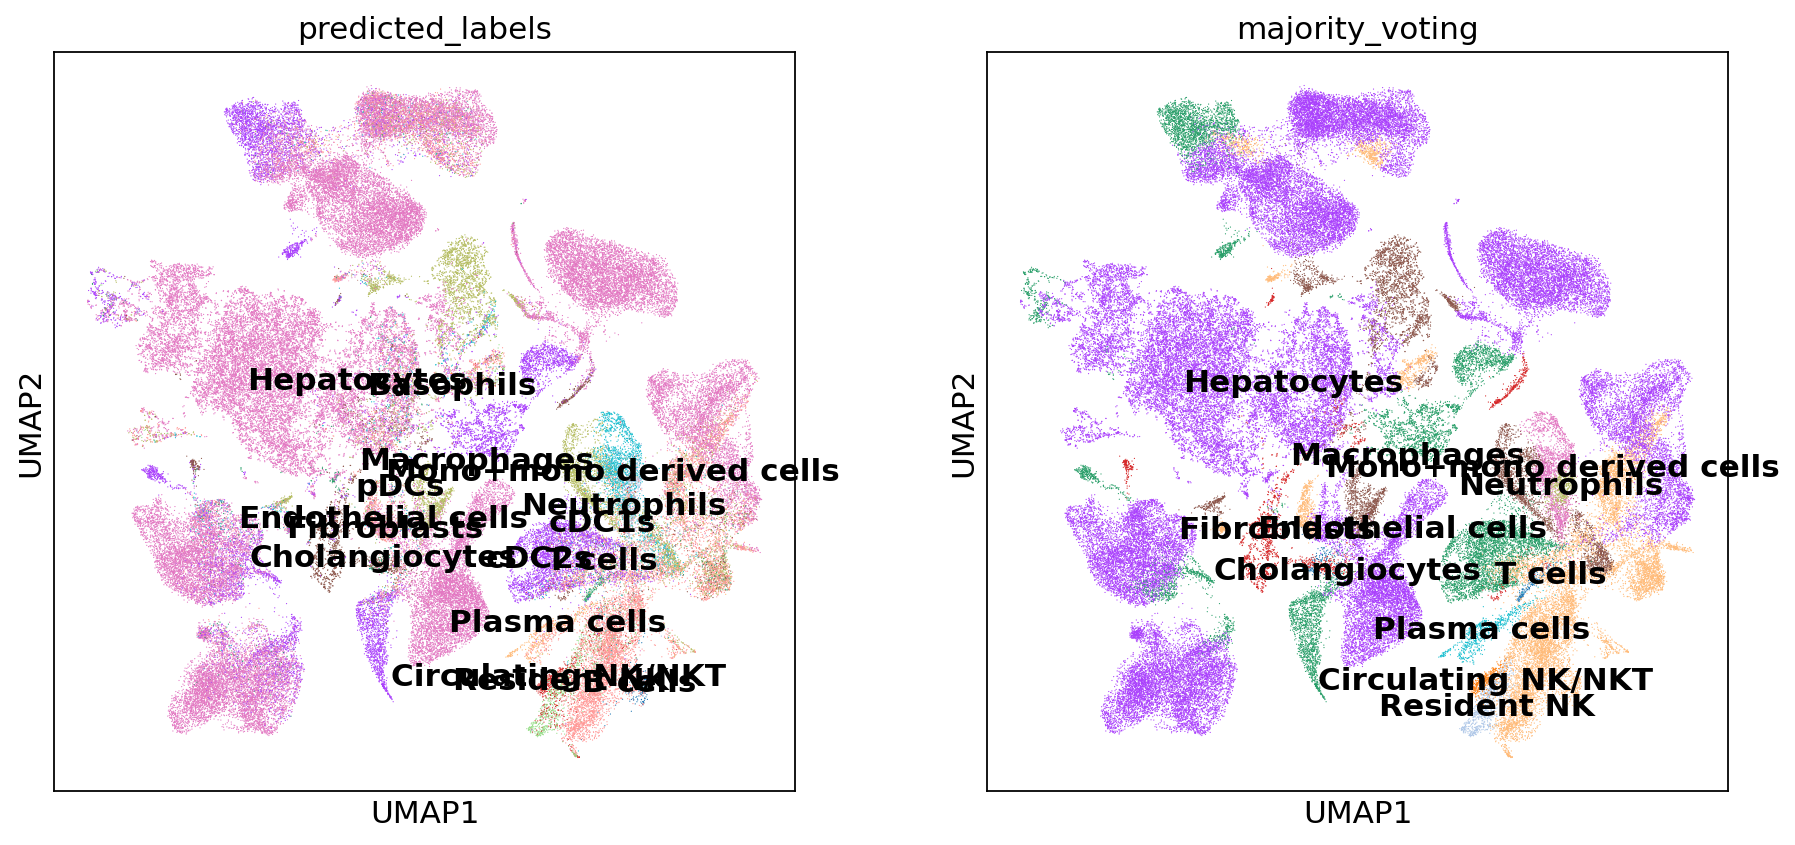

In [32]:
sc.pl.umap(adata, color = ['predicted_labels', 'majority_voting'], legend_loc = 'on data')

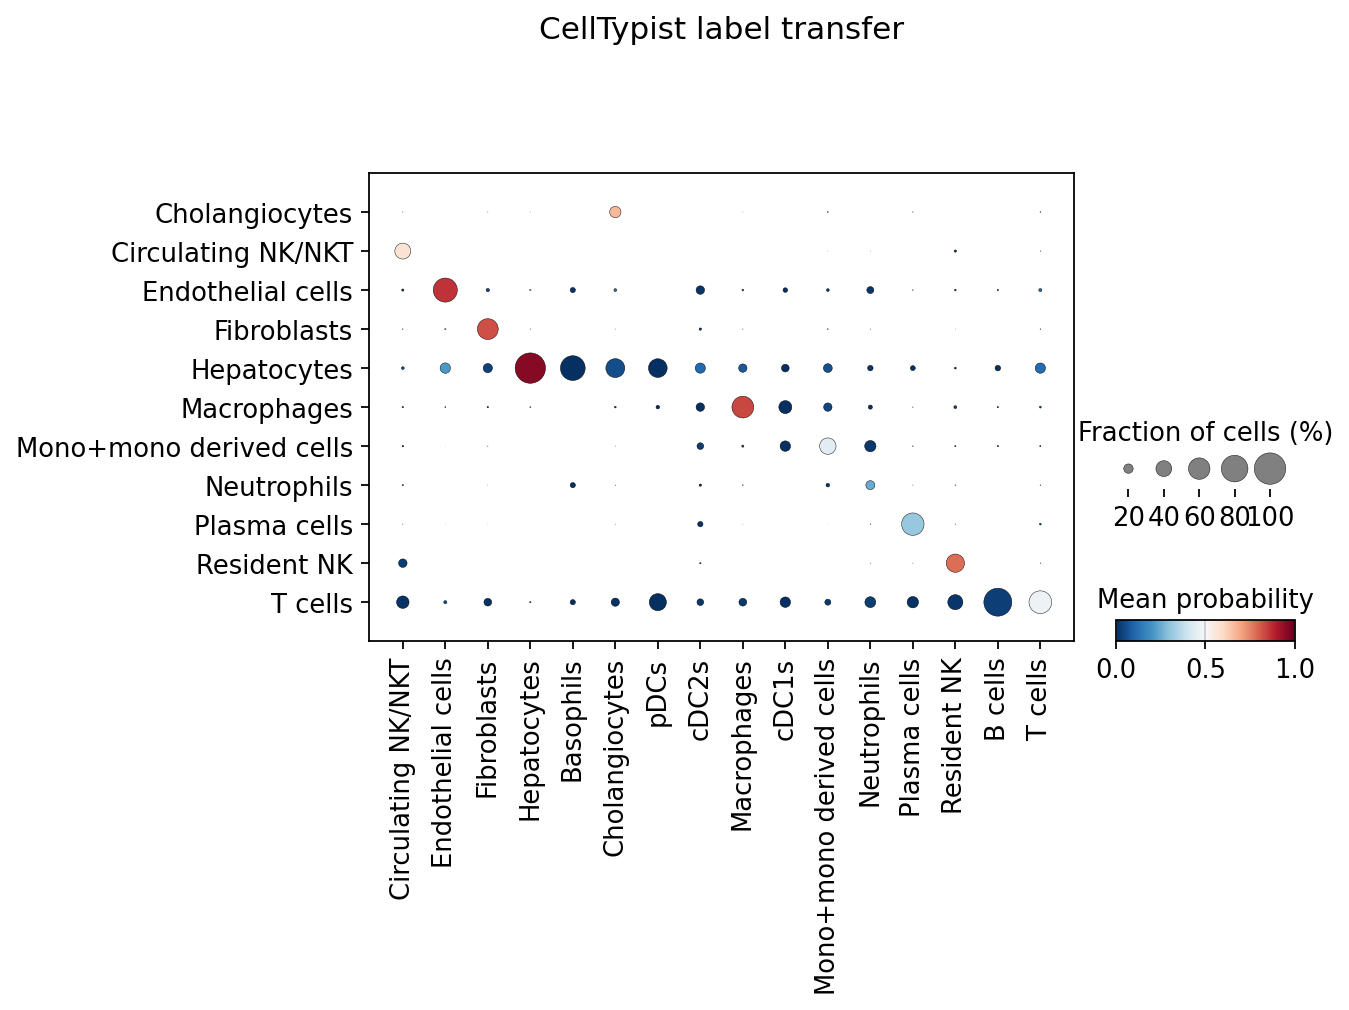

In [33]:
celltypist.dotplot(predictions, use_as_reference = 'predicted_labels', use_as_prediction = 'majority_voting')

In [34]:
adata

AnnData object with n_obs × n_vars = 105197 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'over_clustering', 'predicted_labels_colors', 'majority_voting_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [35]:
def predict_cells(adata):
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.normalize_total(adata, target_sum=1e4) #not recommended for typical pp
    sc.pp.log1p(adata)

    adata.X = adata.X.toarray()
    predictions = celltypist.annotate(adata, model = 'Healthy_Human_Liver.pkl', 
                                  majority_voting = True)
    adata = predictions.to_adata()
    adata.obs["predicted_label"] = adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["over_clustering"] = adata.obs.loc[adata.obs.index, "over_clustering"]
    adata.obs["majority_voting"] = adata.obs.loc[adata.obs.index, "majority_voting"]

    return adata.obs

In [37]:
dataset = adata[:105197, :]
predictions = predict_cells(dataset.copy())
print(predictions)

🔬 Input data has 105197 cells and 11762 genes
🔗 Matching reference genes in the model
🧬 2027 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!


                    n_genes         Sample  doublet  n_genes_by_counts  \
AAACCCAAGACCGCCT-1     1419     h5ad/tumor    False               1419   
AAACCCAAGAGGCGGA-1      808     h5ad/tumor    False                808   
AAACCCAAGCAGCCTC-1     1700     h5ad/tumor    False               1700   
AAACCCAAGCCGTTAT-1     3397     h5ad/tumor    False               3397   
AAACCCAAGGACGGAG-1     3444     h5ad/tumor    False               3444   
...                     ...            ...      ...                ...   
TTTGTTGGTCCTTTGC-1     5512  h5ad/control7    False               5512   
TTTGTTGGTCTCGGGT-1     2940  h5ad/control7    False               2940   
TTTGTTGGTGCCTGCA-1     3599  h5ad/control7    False               3599   
TTTGTTGTCAGAACCT-1     3305  h5ad/control7    False               3305   
TTTGTTGTCCGATCTC-1     2777  h5ad/control7    False               2777   

                    total_counts  total_counts_mt  pct_counts_mt  _scvi_batch  \
AAACCCAAGACCGCCT-1        2097

In [38]:
predictions = predictions[['predicted_label', 'over_clustering', 'majority_voting']]
predictions

,predicted_label,over_clustering,majority_voting
AAACCCAAGACCGCCT-1,Hepatocytes,485,Hepatocytes
AAACCCAAGAGGCGGA-1,Hepatocytes,386,Hepatocytes
AAACCCAAGCAGCCTC-1,Cholangiocytes,262,Hepatocytes
AAACCCAAGCCGTTAT-1,Endothelial cells,265,Endothelial cells
AAACCCAAGGACGGAG-1,Hepatocytes,416,Hepatocytes
...,...,...,...
TTTGTTGGTCCTTTGC-1,Hepatocytes,146,Hepatocytes
TTTGTTGGTCTCGGGT-1,Hepatocytes,164,Hepatocytes
TTTGTTGGTGCCTGCA-1,Hepatocytes,200,Hepatocytes
TTTGTTGTCAGAACCT-1,Hepatocytes,127,Hepatocytes


In [39]:
adata

AnnData object with n_obs × n_vars = 105197 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'over_clustering', 'predicted_labels_colors', 'majority_voting_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [40]:
# Crear DataFrames sin duplicados
obs_clean = adata.obs[~adata.obs.index.duplicated(keep='first')]
predictions_clean = predictions[~predictions.index.duplicated(keep='first')]

# Verificar nuevamente las longitudes después de eliminar duplicados
print(f"Longitud de obs_clean después de eliminar duplicados: {len(obs_clean)}")
print(f"Longitud de predictions_clean después de eliminar duplicados: {len(predictions_clean)}")

# Asegúrate de que ambos índices estén alineados
common_index = obs_clean.index.intersection(predictions_clean.index)
obs_clean = obs_clean.loc[common_index]
predictions_clean = predictions_clean.loc[common_index]

print(f"Índices comunes después de eliminar duplicados: {len(common_index)}")

# Realiza el merge
merged_obs = obs_clean.merge(right=predictions_clean, left_index=True, right_index=True)

# Crear un DataFrame temporal con los índices alineados
temp_obs = pd.DataFrame(index=adata.obs.index)
temp_obs = temp_obs.join(merged_obs, how="left")

# Verificar el resultado
print(f"Longitud final de temp_obs: {len(temp_obs)}")

Longitud de obs_clean después de eliminar duplicados: 105197
Longitud de predictions_clean después de eliminar duplicados: 105197
Índices comunes después de eliminar duplicados: 105197
Longitud final de temp_obs: 105197


In [41]:
# Asignar el DataFrame temporal a adata.obs
adata.obs = temp_obs

# Verificar el resultado final
print(f"Longitud final de adata.obs: {len(adata.obs)}")

Longitud final de adata.obs: 105197


In [42]:
adata

AnnData object with n_obs × n_vars = 105197 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering_x', 'majority_voting_x', 'conf_score', 'predicted_label', 'over_clustering_y', 'majority_voting_y'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'over_clustering', 'predicted_labels_colors', 'majority_voting_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [43]:
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].astype(str)

In [44]:
print(adata)

AnnData object with n_obs × n_vars = 105197 × 11762
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering_x', 'majority_voting_x', 'conf_score', 'predicted_label', 'over_clustering_y', 'majority_voting_y'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap', 'over_clustering', 'predicted_labels_colors', 'majority_voting_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'


In [45]:
adata.obs

,n_genes,Sample,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden,predicted_labels,over_clustering_x,majority_voting_x,conf_score,predicted_label,over_clustering_y,majority_voting_y
AAACCCAAGACCGCCT-1,1419,h5ad/tumor,False,1419,2097.0,0.0,0.0,0,0,17,Hepatocytes,485,Hepatocytes,0.9999959590211367,Hepatocytes,485,Hepatocytes
AAACCCAAGAGGCGGA-1,808,h5ad/tumor,False,808,1059.0,0.0,0.0,0,0,26,Hepatocytes,386,Hepatocytes,0.9999995623280874,Hepatocytes,386,Hepatocytes
AAACCCAAGCAGCCTC-1,1700,h5ad/tumor,False,1700,2728.0,0.0,0.0,0,0,19,Cholangiocytes,262,Hepatocytes,0.8311519273082394,Cholangiocytes,262,Hepatocytes
AAACCCAAGCCGTTAT-1,3397,h5ad/tumor,False,3397,8238.0,0.0,0.0,0,0,31,Endothelial cells,265,Endothelial cells,0.7876501555447959,Endothelial cells,265,Endothelial cells
AAACCCAAGGACGGAG-1,3444,h5ad/tumor,False,3444,8871.0,0.0,0.0,0,0,19,Hepatocytes,416,Hepatocytes,1.0,Hepatocytes,416,Hepatocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTTTGC-1,5512,h5ad/control7,False,5512,22386.0,0.0,0.0,0,0,4,Hepatocytes,146,Hepatocytes,1.0,Hepatocytes,146,Hepatocytes
TTTGTTGGTCTCGGGT-1,2940,h5ad/control7,False,2940,7561.0,0.0,0.0,0,0,4,Hepatocytes,164,Hepatocytes,1.0,Hepatocytes,164,Hepatocytes
TTTGTTGGTGCCTGCA-1,3599,h5ad/control7,False,3599,10608.0,0.0,0.0,0,0,4,Hepatocytes,200,Hepatocytes,1.0,Hepatocytes,200,Hepatocytes
TTTGTTGTCAGAACCT-1,3305,h5ad/control7,False,3305,9792.0,0.0,0.0,0,0,4,Hepatocytes,127,Hepatocytes,1.0,Hepatocytes,127,Hepatocytes


In [ ]:
sc.pl.embedding(adata, basis=SCVI_MDE_KEY, color=["predicted_label", 'majority_voting'], frameon=False, ncols=1)

In [ ]:
adata.write_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/probe_annotatedCellTypist.h5ad')